## **НАЧАЛО ЛАБЫ**

Выгрузка данных из csv

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("..//static//csv//neo.csv", nrows=15000)
print(df.columns)


Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


## **СТОЛБЦЫ ДАТАСЕТА:**

**Id**

**name**

**est_diameter_min** – минимальный радиус косм. объекта (астероид, комета) рядом с Землёй (км)

**est_diameter_max** – максимальный радиус косм. объекта

**relative_velocity** – скорость относительно Земли (км/с)

**miss_distance** – расстояние, на кот. проходит рядом с Землёй (км)

**orbiting_body** – тело, вокруг которого вращается (везде Земля)

**sentry_object** – ведётся ли за ним авто мониторинг, как за телом, кот. может столкнуться с Землёй (везде  false)

**absolute_magnitude** – звёздная величина (яркость)

**hazardous** – опасный для Земли / нет

## Диаграмма ниже показывает разницу между максимальным вероятным диаметром космического объекта и минамальным (на срезе первых 100 объектов). С помощью неё можно увидеть, что у большинства объектов разница между этими двумя значениями составляет меньше 1 км, что говорит о достаточно хорошей точности измерения размера объекта

<Axes: title={'center': 'Разница между макс. диаметром (est_diameter_max) и мин диаметром (est_diameter_min) объекта (первые 100 записей)'}, xlabel='Порядковый номер объекта в датасете', ylabel='Разница'>

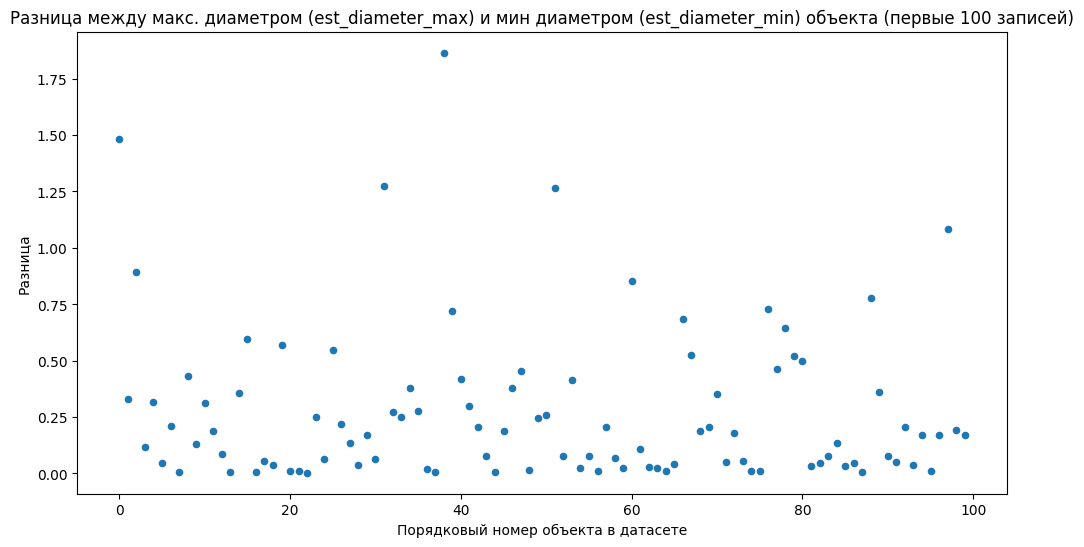

In [4]:
data1 = df[:100].copy()
data1['diameter_dif'] = data1['est_diameter_max'] - data1['est_diameter_min']
data1['index'] = data1.index
data1.plot(kind='scatter', x='index', xlabel='Порядковый номер объекта в датасете', y='diameter_dif', ylabel='Разница', figsize=(12, 6), title='Разница между макс. диаметром (est_diameter_max) и мин диаметром (est_diameter_min) объекта (первые 100 записей)')

## На диаграмме ниже показана средняя скорость относительно Земли для космических объектов, которые потенциально опасны (hazardous=true) и неопасны (hazardous=false). С помощью неё можно сделать вывод о том, что потенциально опасны те космические объекты, у которых относительная скорость в среднем больше 60 000 км/с

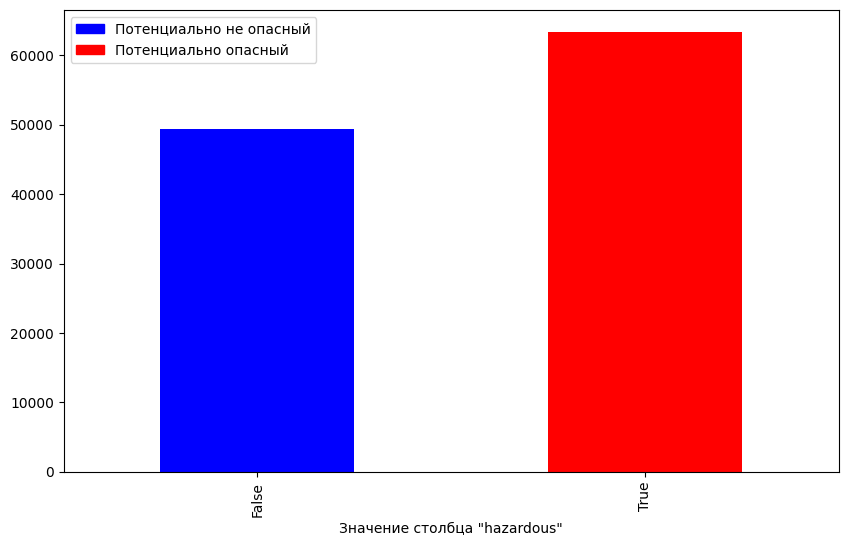

In [5]:
# Группировка данных по значению 'hazardous' и вычисление средней относительной скорости
data2 = df.groupby('hazardous')['relative_velocity'].mean()
handles = [plt.Rectangle((0,0),1,1, color='blue'), plt.Rectangle((0,0),1,1, color='red')]
labels = ['Потенциально не опасный', 'Потенциально опасный']
data2.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'], xlabel='Значение столбца "hazardous"')
plt.legend(handles, labels)

## Диаграмма ниже показывает процентное соотношение космических объектов, за которыми ведётся автоматическое наблюдение, т.к. они представляют серьёзную угрозу, и космических объектов, за которыми такое наблюдение не ведётся. На диаграмме видно, что за всеми космическими объектами наблюдения не ведётся. Это означает, что в данном датасете нет настолько опасных космических объектов, которые требовали бы постоянных наблюдений

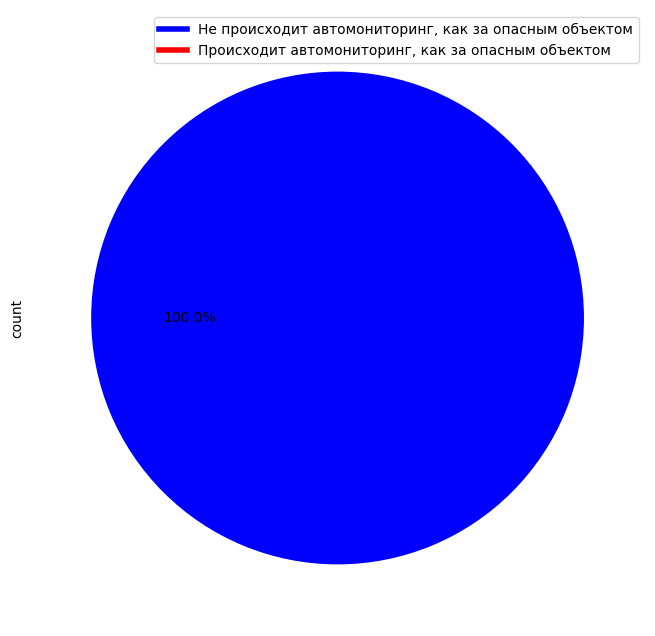

In [6]:
data3=df['sentry_object'].value_counts()
labels=['Не происходит автомониторинг, как за опасным объектом', 'Происходит автомониторинг, как за опасным объектом']
colors=['blue', 'red']
data3.plot(kind='pie', figsize=(8, 8), labels=None, colors=colors, autopct='%1.1f%%')
handles = [plt.Line2D([0], [0], color=colors[0], lw=4), plt.Line2D([0], [0], color=colors[1], lw=4)]
plt.legend(handles, labels)